In [2]:
#!cp 0-initialize.py 1-kmeans.py
!chmod +x *.py

In [7]:
import scipy
import sklearn

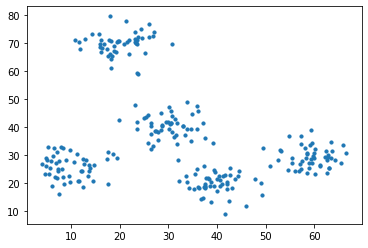

[[14.54730144 13.46780434]
 [20.57098466 33.55245039]
 [ 9.55556506 51.51143281]
 [48.72458008 20.03154959]
 [25.43826106 60.35542243]]


In [21]:
#!/usr/bin/env python3

import numpy as np
import matplotlib.pyplot as plt
""" initialize cluster centroids for K-means """

import numpy as np


def initialize(X, k):
    """ doc """
    try:
        n, d = X.shape
        return np.random.uniform(np.amin(X, axis=0),
                                 np.amax(X, axis=0),
                                 size=(k, d))
    except Exception:
        return None

if __name__ == "__main__":
    np.random.seed(0)
    a = np.random.multivariate_normal([30, 40], [[16, 0], [0, 16]], size=50)
    b = np.random.multivariate_normal([10, 25], [[16, 0], [0, 16]], size=50)
    c = np.random.multivariate_normal([40, 20], [[16, 0], [0, 16]], size=50)
    d = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=50)
    e = np.random.multivariate_normal([20, 70], [[16, 0], [0, 16]], size=50)
    X = np.concatenate((a, b, c, d, e), axis=0)
    np.random.shuffle(X)
    plt.scatter(X[:, 0], X[:, 1], s=10)
    plt.show()
    print(initialize(X, 5))

[[ 9.92511389 25.73098987]
 [30.06722465 40.41123947]
 [59.22766628 29.19796006]
 [39.62770705 19.89843487]
 [20.0835633  69.81592298]]
[1 1 4 1 2 0 1 3 4 3 3 1 4 3 4 0 3 2 3 4 0 1 4 2 1 0 3 3 0 2 2 1 4 0 3 1 2
 1 2 4 4 3 1 0 3 1 1 1 4 2 2 4 1 4 1 0 1 0 1 1 0 0 2 0 2 2 1 3 4 2 4 3 1 1
 0 1 4 0 1 4 2 1 2 4 0 3 0 1 2 4 1 0 2 1 1 4 0 4 3 2 1 0 2 3 3 1 0 3 2 3 0
 0 3 4 3 0 0 4 0 0 3 3 1 4 1 4 4 2 4 0 1 0 2 4 2 0 1 3 1 2 1 2 4 2 4 4 2 0
 0 4 2 0 2 3 4 4 4 2 2 3 0 0 1 3 3 2 3 0 4 4 4 4 1 3 2 4 0 2 2 0 3 3 0 4 0
 4 3 3 4 4 2 3 2 1 3 3 2 2 0 1 2 3 3 1 2 4 2 0 1 2 1 0 1 0 0 1 1 0 4 1 4 3
 3 0 4 3 2 3 2 4 4 3 3 2 3 2 3 1 0 2 2 2 0 4 3 1 0 3 0 3]


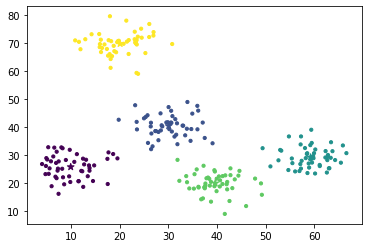

In [48]:
#!/usr/bin/env python3

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
#kmeans = __import__('1-kmeans').kmeans

def kmeans(X, k, iterations=1000):
    """ doc """
    n, d = X.shape
    init = np.random.uniform(np.amin(X, axis=0),
                                 np.amax(X, axis=0),
                                 size=(k, d))
    km = KMeans(n_clusters=k, init=init, n_init=1, max_iter=iterations).fit(X)
    return km.cluster_centers_, km.labels_

if __name__ == "__main__":
    np.random.seed(0)
    a = np.random.multivariate_normal([30, 40], [[16, 0], [0, 16]], size=50)
    b = np.random.multivariate_normal([10, 25], [[16, 0], [0, 16]], size=50)
    c = np.random.multivariate_normal([40, 20], [[16, 0], [0, 16]], size=50)
    d = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=50)
    e = np.random.multivariate_normal([20, 70], [[16, 0], [0, 16]], size=50)
    X = np.concatenate((a, b, c, d, e), axis=0)
    np.random.shuffle(X)
    C, clss = kmeans(X, 5)
    print(C)
    print(clss)
    plt.scatter(X[:, 0], X[:, 1], s=10, c=clss)
    plt.scatter(C[:, 0], C[:, 1], s=50, marker='*', c=list(range(5)))
    plt.show()

[[ 9.92511389 25.73098987]
 [30.06722465 40.41123947]
 [39.62770705 19.89843487]
 [59.22766628 29.19796006]
 [20.0835633  69.81592298]]
____________
(250,)
[1 1 4 1 3 0 1 2 4 2 2 1 4 2 4 0 2 3 2 4 0 1 4 3 1 0 2 2 0 3 3 1 4 0 2 1 3
 1 3 4 4 2 1 0 2 1 1 1 4 3 3 4 1 4 1 0 1 0 1 1 0 0 3 0 3 3 1 2 4 3 4 2 1 1
 0 1 4 0 1 4 3 1 3 4 0 2 0 1 3 4 1 0 3 1 1 4 0 4 2 3 1 0 3 2 2 1 0 2 3 2 0
 0 2 4 2 0 0 4 0 0 2 2 1 4 1 4 4 3 4 0 1 0 3 4 3 0 1 2 1 3 1 3 4 3 4 4 3 0
 0 4 3 0 3 2 4 4 4 3 3 2 0 0 1 2 2 3 2 0 4 4 4 4 1 2 3 4 0 3 3 0 2 2 0 4 0
 4 2 2 4 4 3 2 3 1 2 2 3 3 0 1 3 2 2 1 3 4 3 0 1 3 1 0 1 0 0 1 1 0 4 1 4 2
 2 0 4 2 3 2 3 4 4 2 2 3 2 3 2 1 0 3 3 3 0 4 2 1 0 2 0 2]


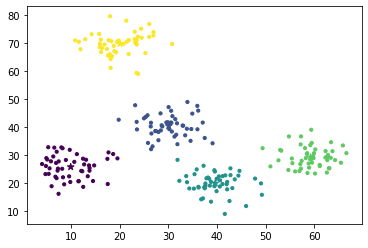

In [50]:
#!/usr/bin/env python3

import numpy as np
import matplotlib.pyplot as plt
#kmeans = __import__('1-kmeans').kmeans

def kmeans(X, k, iterations=1000):
    """ doc """
    n, d = X.shape
    if type(iterations) is not int or iterations < 1:
        return None, None
    C = initialize(X, k)
    if C is None:
        return None, None
    clss = None
    for itr in range(iterations):
        prevC = C.copy()
        clss = np.apply_along_axis(np.subtract, 1, X, C)
        clss = np.argmin(np.square(clss).sum(axis=2), axis=1)
        for cent in range(k):
            Xs = np.argwhere(clss == cent)
            if Xs.shape[0] == 0:
                C[cent] = initialize(X, 1)
            else:
                C[cent] = np.mean(X[Xs], axis=0)
        if np.all(prevC == C):
            break;
    return C, clss

if __name__ == "__main__":
    np.random.seed(0)
    a = np.random.multivariate_normal([30, 40], [[16, 0], [0, 16]], size=50)
    b = np.random.multivariate_normal([10, 25], [[16, 0], [0, 16]], size=50)
    c = np.random.multivariate_normal([40, 20], [[16, 0], [0, 16]], size=50)
    d = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=50)
    e = np.random.multivariate_normal([20, 70], [[16, 0], [0, 16]], size=50)
    X = np.concatenate((a, b, c, d, e), axis=0)
    np.random.shuffle(X)
    C, clss = kmeans(X, 5)
    print(C)
    print("____________")
    print(clss.shape)
    print(clss)
    
    plt.scatter(X[:, 0], X[:, 1], s=10, c=clss)
    plt.scatter(C[:, 0], C[:, 1], s=50, marker='*', c=list(range(5)))
    plt.show()

In [ ]:
def calc_distance(X1, X2):
    return(sum((X1 - X2)**2))**0.5